In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [25]:
CC_19 = pd.read_csv ("Defunciones_T.csv")
CC_19.head()


,Region,Antofagasta,Antofagasta.1,Antofagasta.2,Antofagasta.3,Antofagasta.4,Antofagasta.5,Antofagasta.6,Antofagasta.7,Arica y Parinacota,...,Ñuble.11,Ñuble.12,Ñuble.13,Ñuble.14,Ñuble.15,Ñuble.16,Ñuble.17,Ñuble.18,Ñuble.19,Ñuble.20
0,Codigo region,2,2,2,2,2,2,2,2,15,...,16,16,16,16,16,16,16,16,16,16
1,Comuna,Antofagasta,Calama,María Elena,Mejillones,Ollagüe,San Pedro de Atacama,Taltal,Tocopilla,Arica,...,Quillón,Quirihue,Ranquil,San Carlos,San Fabián,San Ignacio,San Nicolás,Treguaco,Yungay,Ñiquén
2,Codigo comuna,2101,2201,2302,2102,2202,2203,2104,2301,15101,...,16107,16201,16206,16301,16304,16108,16305,16207,16109,16303
3,2010-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2010-01-02,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
DataCC_19 = CC_19.drop(0,axis=0)
DataCC_19 = DataCC_19.drop(1,axis=0)
DataCC_19 = DataCC_19.drop(2,axis=0)   ##Eliminamos la fila 0,1,2
DataCC_19.head()

,Region,Antofagasta,Antofagasta.1,Antofagasta.2,Antofagasta.3,Antofagasta.4,Antofagasta.5,Antofagasta.6,Antofagasta.7,Arica y Parinacota,...,Ñuble.11,Ñuble.12,Ñuble.13,Ñuble.14,Ñuble.15,Ñuble.16,Ñuble.17,Ñuble.18,Ñuble.19,Ñuble.20
3,2010-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2010-01-02,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2010-01-03,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2010-01-04,8,6,0,1,0,0,1,1,9,...,1,0,1,7,0,0,0,0,1,0
7,2010-01-05,0,3,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0


In [33]:
columna= DataCC_19.iloc[:,1:].columns.tolist()
DataCC_19[columna] = DataCC_19[columna].astype(np.int64)  ##Seleccionamos datos de la primera columna para convertirlos 
DataCC_19['Total'] = DataCC_19.sum(axis=1)    ##Creamos una columna que contenga la sumatoria de las muertes en un dia x
columna_1= DataCC_19.iloc[:,1:338].columns.tolist()
DataCC_19_Total = DataCC_19.drop(columna_1,axis=1)   ##Eliminamos de nuestra data original los datos para quedarnos solo con la sumatoria de las muertes
DataCC_19_Total['Region'] = pd.to_datetime(DataCC_19_Total.Region)  ##Convertimos para tranformarlo en un datatime de python
DataCC_19_Total.set_axis(['Fecha', 'Total'],axis='columns', inplace=True)

DataCC_19_Total

,Fecha,Total
3,2010-01-01,88
4,2010-01-02,120
5,2010-01-03,83
6,2010-01-04,641
7,2010-01-05,275
...,...,...
4125,2021-04-15,402
4126,2021-04-16,413
4127,2021-04-17,141
4128,2021-04-18,130


In [41]:
DataCC_19_Total.groupby(pd.Grouper(key='Fecha', freq='1M')).sum()    ##Agrupamos muertes por mes

,Total
Fecha,
2010-01-31,7213
2010-02-28,6658
2010-03-31,8192
2010-04-30,7425
2010-05-31,8246
...,...
2020-12-31,9994
2021-01-31,10784
2021-02-28,10229


In [114]:
C19_2010 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2010]
C19_2010 = C19_2010.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2011 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2011]
C19_2011 = C19_2011.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2012 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2012]
C19_2012 = C19_2012.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2013 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2013]
C19_2013 = C19_2013.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2014 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2014]
C19_2014 = C19_2014.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2015 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2015]
C19_2015 = C19_2015.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2016 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2016]
C19_2016 = C19_2016.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2017 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2017]
C19_2017 = C19_2017.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2018 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2018]
C19_2018 = C19_2018.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2019 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2019]
C19_2019 = C19_2019.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2020 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2020]
C19_2020 = C19_2020.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2021 = DataCC_19_Total[DataCC_19_Total['Fecha'].dt.year == 2021]
C19_2021 = C19_2021.groupby(pd.Grouper(key='Fecha', freq='W-MON')).sum()

C19_2020

,Total
Fecha,
2020-01-06,1792
2020-01-13,2121
2020-01-20,2000
2020-01-27,2003
2020-02-03,1990
2020-02-10,1960
2020-02-17,1950
2020-02-24,1808
2020-03-02,1835


[Text(0.5, 0, 'Fecha'),
 Text(0, 0.5, 'Muertes'),
 Text(0.5, 1.0, 'Muertes Semanales en Chile Jan-2018 ; Apr-2021')]

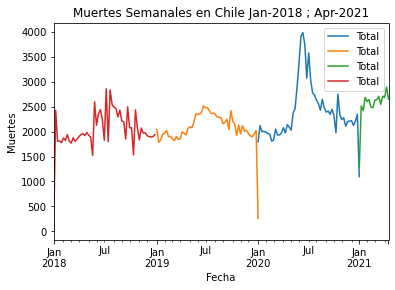

In [118]:
ax = C19_2020.plot()  ##Color Azul

C19_2019.plot(ax=ax)  ##Color Amarillo

C19_2021.plot(ax=ax)  ##Color Verde

C19_2018.plot(ax=ax)  ##Color Rojo

ax.set(xlabel="Fecha",
       ylabel="Muertes",
       title="Muertes Semanales en Chile Jan-2018 ; Apr-2021")

### Para el caso tomamos 2 años anteriores antes de la pandemia y los 2 por los que hemos pasado actualmente, en el grafico podemos observar el incremento drastico que se genera en muertes en particular en el mes de Julio prepandemia v/s pandemia